In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [273]:
ds = pd.read_csv("C:/Users/ASUS/Desktop/Machine Learning Lab/Datasets/Mall_Customers.csv")

In [274]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [275]:
ds.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [276]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [277]:
ds.shape

(200, 5)

In [278]:
dsu = ds.drop("CustomerID", axis=1)

In [279]:
dsu

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [280]:
dsu.mean(numeric_only=True)

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [281]:
dsu.mode(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
0,32.0,54,42.0
1,NaN,78,NaN


In [282]:
dsu.median(numeric_only=True)

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [283]:
dsu.std(numeric_only=True)

Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

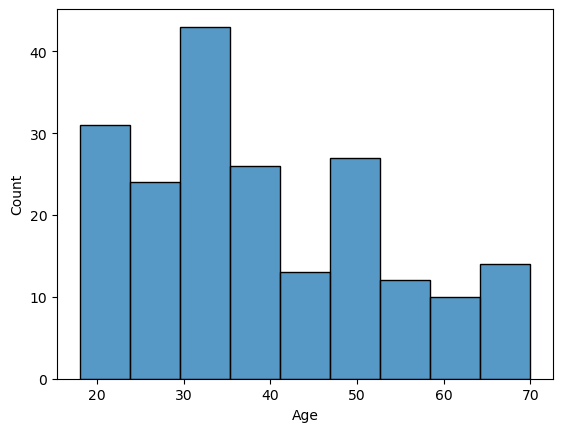

In [284]:
sns.histplot(data=dsu, x="Age")

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

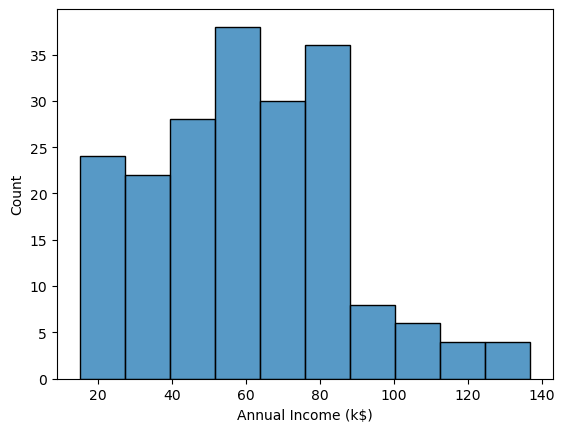

In [285]:
sns.histplot(data=dsu, x="Annual Income (k$)")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

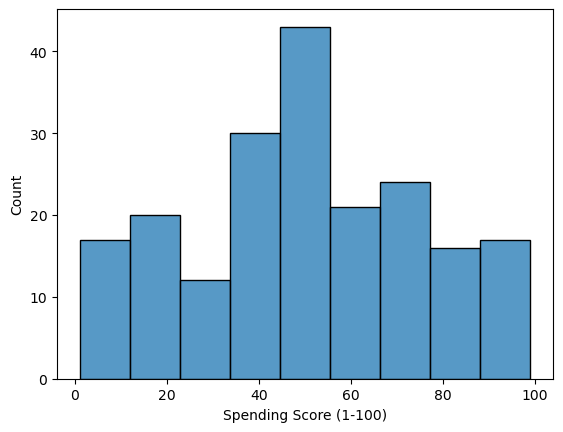

In [286]:
sns.histplot(data=dsu, x="Spending Score (1-100)")

<Axes: >

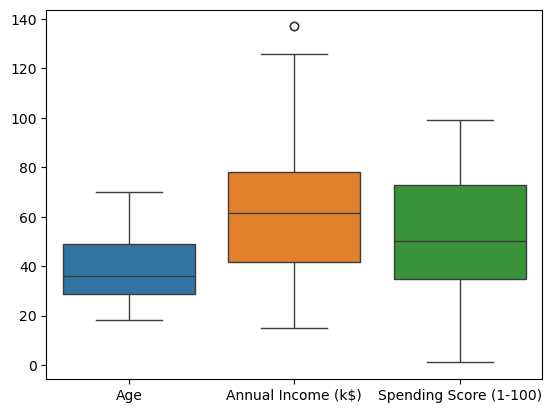

In [303]:
sns.boxplot(data=dsu)

In [304]:
from sklearn.cluster import KMeans

In [305]:
#x=dsu["Spending Score (1-100)"]
#y=dsu[ "Annual Income (k$)"]

In [306]:
X = dsu[["Annual Income (k$)", "Spending Score (1-100)",]]

In [307]:
means = KMeans(n_clusters=3)

In [308]:
means.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [309]:
pred=means.predict(X)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31960\374742851.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Clusters")


Text(0, 0.5, 'Spending Score (1-100)')

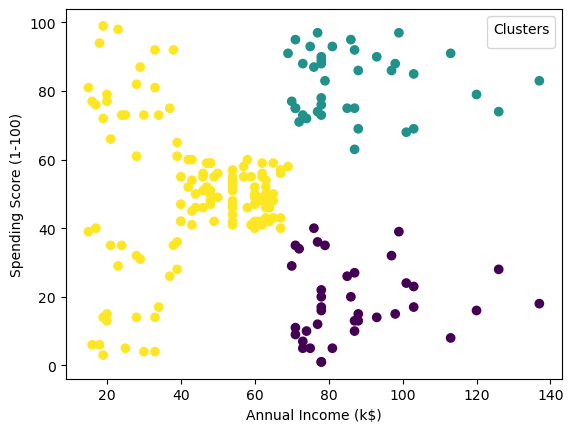

In [310]:
plt.scatter(dsu["Annual Income (k$)"], dsu["Spending Score (1-100)"],c=pred)
plt.legend(title="Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [311]:
means.cluster_centers_

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

In [312]:
means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [313]:
means.inertia_

106348.37306211118

In [314]:
ls=[]
for i in range(1,16):
    means=KMeans(n_clusters=i)
    means.fit(X)
    ls.append(means.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inertia')

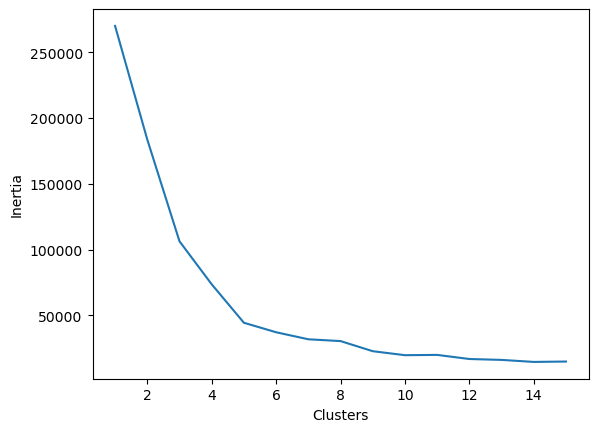

In [315]:
plt.plot(range(1,16),ls)
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [316]:
means1 = KMeans(n_clusters=5)

In [317]:
means1.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [318]:
pred1=means1.predict(X)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31960\2339011203.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Clusters")


Text(0, 0.5, 'Spending Score (1-100)')

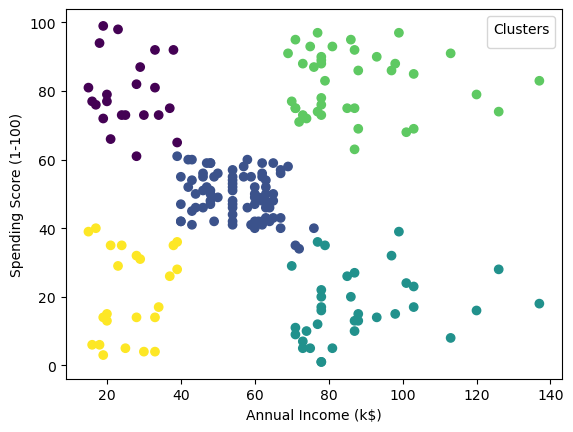

In [319]:
plt.scatter(dsu["Annual Income (k$)"],dsu["Spending Score (1-100)"],c=pred1)
plt.legend(title="Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [320]:
AnualIncome = int(input("Input Annual Income: "))
SpendingScore = int(input("Input Spending Score: "))

user_data = [[AnualIncome, SpendingScore]]

Input Annual Income:  80
Input Spending Score:  20


In [321]:
prediction = means1.predict(user_data)
print(f"Cluster: {prediction}")


Cluster: [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


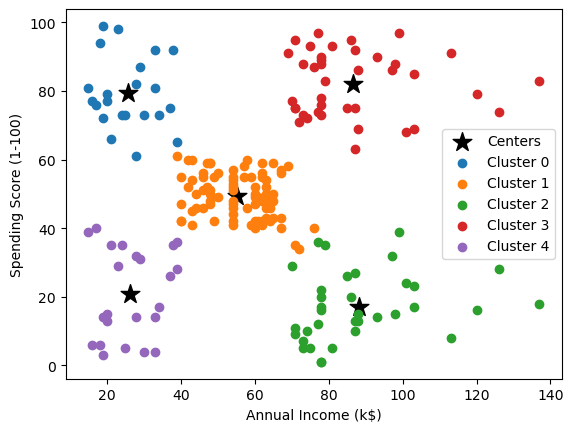

In [322]:
plt.scatter(means1.cluster_centers_ [:, 0], means1.cluster_centers_[:, 1] , c="black", s=200, marker='*',label="Centers")

labels = means1.labels_


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.scatter(x=dsu.loc[labels == 0, ["Annual Income (k$)"]], y=dsu.loc[labels == 0, ["Spending Score (1-100)"]], label="Cluster 0")
plt.scatter(x=dsu.loc[labels == 1, ["Annual Income (k$)"]], y=dsu.loc[labels == 1, ["Spending Score (1-100)"]], label="Cluster 1")
plt.scatter(x=dsu.loc[labels == 2, ["Annual Income (k$)"]], y=dsu.loc[labels == 2, ["Spending Score (1-100)"]], label="Cluster 2")
plt.scatter(x=dsu.loc[labels == 3, ["Annual Income (k$)"]], y=dsu.loc[labels == 3, ["Spending Score (1-100)"]], label="Cluster 3")
plt.scatter(x=dsu.loc[labels == 4, ["Annual Income (k$)"]], y=dsu.loc[labels == 4, ["Spending Score (1-100)"]], label="Cluster 4")

plt.legend()

In [323]:
means1.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [324]:
from sklearn.cluster import AgglomerativeClustering

drd = AgglomerativeClustering(n_clusters=5)
drd.fit(X)

AgglomerativeClustering(n_clusters=5)

In [325]:
drd.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0, 0.5, 'Spending Score (1-100)')

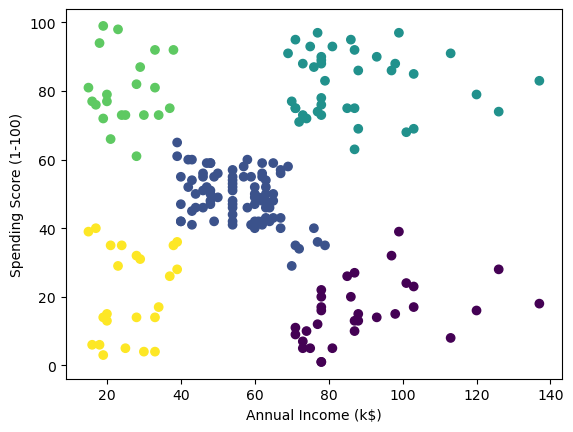

In [326]:
# scatter plot
plt.scatter(x=X["Annual Income (k$)"], y=X["Spending Score (1-100)"], c=drd.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

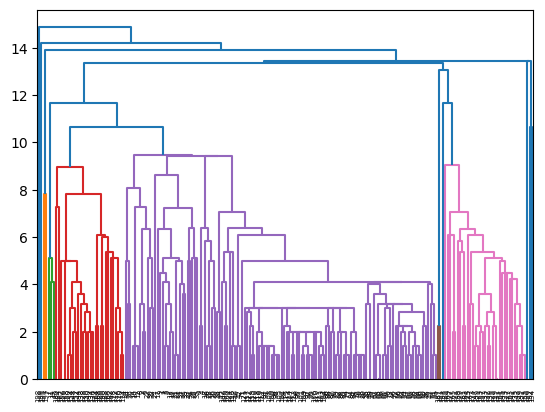

In [327]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'single')

plt.figure()

dn = hierarchy.dendrogram(Z)

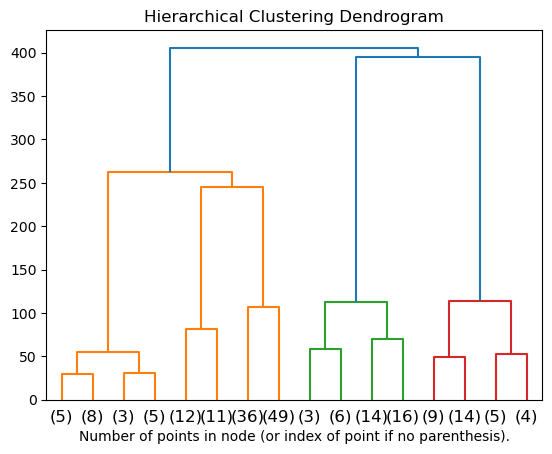

In [328]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

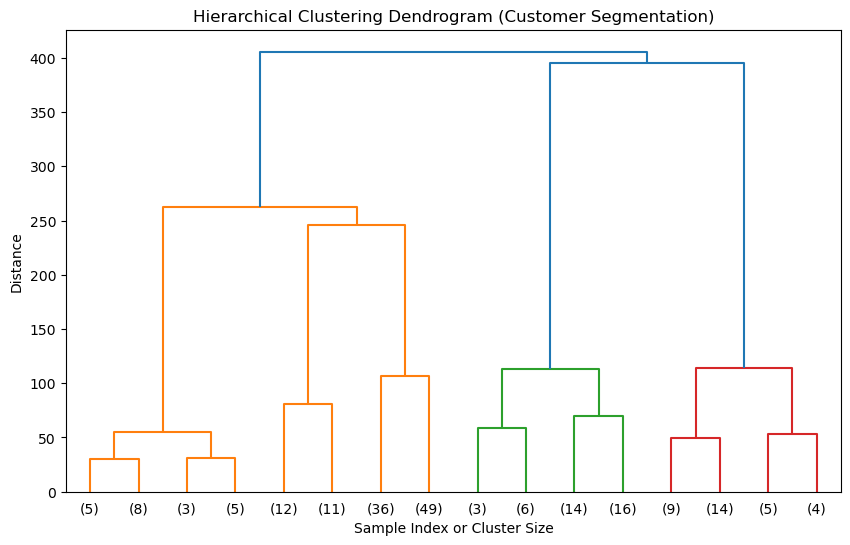

In [329]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# --------------------------------------------
# 3. Build full hierarchical clustering model
# --------------------------------------------
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# --------------------------------------------
# 4. Plot Dendrogram
# --------------------------------------------
plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram (Customer Segmentation)")
plot_dendrogram(model, truncate_mode="level", p=3, leaf_font_size=10)
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()